# Приют животных. Возьмут себе или вернут?

In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

### Данные

In [3]:
data = pd.read_csv('aac_shelter_outcomes.csv')
data = data[data['outcome_type'].isin(['Adoption','Transfer'])]
data.head(5)

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,2013-10-07T13:06:00,2013-10-07T13:06:00,*Edgar,Partner,Transfer,Intact Male


In [4]:
data['outcome_type'] = data['outcome_type'].replace({'Transfer': 0, 'Adoption': 1})

In [5]:
train = data.head(np.floor(data.shape[0] * 0.75).astype(int))
test = data.tail(np.floor(data.shape[0] * 0.25).astype(int))

In [6]:
train.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,0,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,0,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,1,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,0,Neutered Male
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,2013-10-07T13:06:00,2013-10-07T13:06:00,*Edgar,Partner,0,Intact Male


In [7]:
test.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
58838,3 months,A718709,Cat,Domestic Shorthair Mix,Black,2015-10-05T00:00:00,2016-01-11T18:50:00,2016-01-11T18:50:00,NaN,SCRP,0,Neutered Male
58839,3 months,A727404,Cat,Domestic Medium Hair Mix,Brown Tabby/White,2016-04-03T00:00:00,2016-07-06T09:12:00,2016-07-06T09:12:00,NaN,Foster,1,Neutered Male
58840,1 month,A754960,Cat,Domestic Longhair Mix,Blue/White,2017-06-19T00:00:00,2017-08-14T18:13:00,2017-08-14T18:13:00,Bear,NaN,1,Intact Male
58841,7 months,A732519,Dog,Boxer Mix,Brown/White,2016-07-03T00:00:00,2017-02-12T16:58:00,2017-02-12T16:58:00,Max,NaN,1,Neutered Male
58842,1 year,A722080,Dog,Rat Terrier Mix,Tricolor,2015-03-10T00:00:00,2016-03-15T17:02:00,2016-03-15T17:02:00,Bumi,NaN,1,Neutered Male


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42458 entries, 0 to 58836
Data columns (total 12 columns):
age_upon_outcome    42458 non-null object
animal_id           42458 non-null object
animal_type         42458 non-null object
breed               42458 non-null object
color               42458 non-null object
date_of_birth       42458 non-null object
datetime            42458 non-null object
monthyear           42458 non-null object
name                29023 non-null object
outcome_subtype     22284 non-null object
outcome_type        42458 non-null int64
sex_upon_outcome    42458 non-null object
dtypes: int64(1), object(11)
memory usage: 4.2+ MB


# EDA

In [9]:
train.columns

Index(['age_upon_outcome', 'animal_id', 'animal_type', 'breed', 'color',
       'date_of_birth', 'datetime', 'monthyear', 'name', 'outcome_subtype',
       'outcome_type', 'sex_upon_outcome'],
      dtype='object')

In [10]:
train.name.value_counts(dropna=False)

NaN            13435
Bella            161
Max              126
Daisy            117
Luna             115
               ...  
Mckinley           1
Raccoon            1
Beasley Roe        1
Tortellini         1
*Zepp              1
Name: name, Length: 10032, dtype: int64

In [11]:
train.groupby('animal_type')['outcome_type'].value_counts(normalize=True)

animal_type  outcome_type
Bird         1               0.527397
             0               0.472603
Cat          0               0.521011
             1               0.478989
Dog          1               0.672535
             0               0.327465
Livestock    0               0.714286
             1               0.285714
Other        0               0.758092
             1               0.241908
Name: outcome_type, dtype: float64

### Фичи

чтобы одинаковым образом обработать train и test и не дублировать все операции 2 раза, соединим эти два набора данных в один, не забыв при этом:
1. выкинуть целевую переменную из train
2. проверить на соответствие набора признаков друг другу
3. добавить флаг того, является ли объект тестовым или нет

In [12]:
train.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,0,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,0,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,1,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,0,Neutered Male
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,2013-10-07T13:06:00,2013-10-07T13:06:00,*Edgar,Partner,0,Intact Male


In [13]:
y_train = train.outcome_type
train.drop('outcome_type', axis=1, inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
y_test = test.outcome_type
test.drop('outcome_type', axis=1, inplace=True)

In [15]:
train.columns == test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [16]:
train['is_test'] = 0
test['is_test'] = 1

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
df = pd.concat([train, test])

супер, теперь полный набор данных можно обрабатывать вместе и в любой момент, уже обработанными, обратно разъединить на обучающую и тестовую выборки

In [18]:
df['isMix'] = df['breed'].str[-3:] == 'Mix'

In [19]:
df['age_days'] = (df['datetime'].astype(np.datetime64) - df['date_of_birth'].astype(np.datetime64)).dt.days

In [20]:
df['isMale'] = df['sex_upon_outcome'].str.contains('Male')
df['isReproductive'] = df['sex_upon_outcome'].str.contains('Intact')

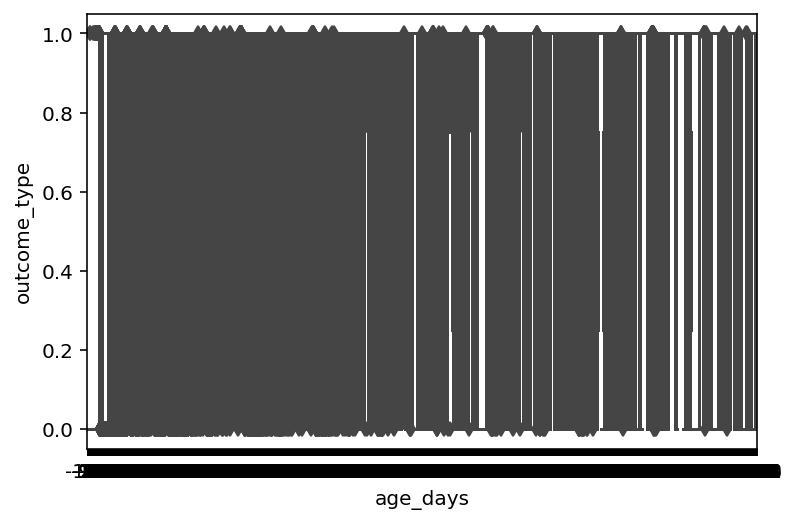

In [21]:
sns.boxplot(x=df[df['is_test'] == 0]['age_days'], y=y_train)

In [22]:
df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,sex_upon_outcome,is_test,isMix,age_days,isMale,isReproductive
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Intact Male,0,True,15,True,True
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Spayed Female,0,True,366,False,False
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Neutered Male,0,False,429,True,False
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Neutered Male,0,True,3300,True,False
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,2013-10-07T13:06:00,2013-10-07T13:06:00,*Edgar,Partner,Intact Male,0,True,126,True,True


In [23]:
df.drop(['age_upon_outcome', 'animal_id', 'breed', 'color',
         'date_of_birth', 'datetime', 'monthyear', 'name', 'sex_upon_outcome'], axis=1, inplace=True)

признаки, значения которых составляют небольшой перечислимый набор, закодируем в отдельные столбцы 

In [24]:
df.outcome_subtype.value_counts(dropna=False)

NaN        27185
Partner    19660
Foster      5558
SCRP        3211
Snr          626
Offsite      367
Barn           3
Name: outcome_subtype, dtype: int64

In [25]:
df['outcome_subtype'].fillna('Unknown', inplace=True)

In [26]:
df_dummies = pd.get_dummies(df, columns=['animal_type', 'outcome_subtype'])

In [27]:
df_dummies.head(10)

,is_test,isMix,age_days,isMale,isReproductive,animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Livestock,animal_type_Other,outcome_subtype_Barn,outcome_subtype_Foster,outcome_subtype_Offsite,outcome_subtype_Partner,outcome_subtype_SCRP,outcome_subtype_Snr,outcome_subtype_Unknown
0,0,True,15,True,True,0,1,0,0,0,0,0,0,1,0,0,0
1,0,True,366,False,False,0,0,1,0,0,0,0,0,1,0,0,0
2,0,False,429,True,False,0,0,1,0,0,0,0,0,0,0,0,1
3,0,True,3300,True,False,0,0,1,0,0,0,0,0,1,0,0,0
5,0,True,126,True,True,0,0,1,0,0,0,0,0,1,0,0,0
7,0,True,1111,False,False,0,0,1,0,0,0,0,0,1,0,0,0
8,0,True,59,False,True,0,1,0,0,0,0,0,0,0,0,0,1
9,0,True,95,False,False,0,1,0,0,0,0,0,1,0,0,0,0
11,0,False,759,True,False,0,0,1,0,0,0,0,0,1,0,0,0
12,0,False,80,True,False,0,0,1,0,0,0,1,0,0,0,0,0


In [28]:
df_dummies.shape

(56610, 17)

In [29]:
X_train = df_dummies[df_dummies.is_test==0].drop('is_test', axis=1)
X_test = df_dummies[df_dummies.is_test==1].drop('is_test', axis=1)

In [30]:
columns = X_train.columns

In [31]:
X_train.head(10)

,isMix,age_days,isMale,isReproductive,animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Livestock,animal_type_Other,outcome_subtype_Barn,outcome_subtype_Foster,outcome_subtype_Offsite,outcome_subtype_Partner,outcome_subtype_SCRP,outcome_subtype_Snr,outcome_subtype_Unknown
0,True,15,True,True,0,1,0,0,0,0,0,0,1,0,0,0
1,True,366,False,False,0,0,1,0,0,0,0,0,1,0,0,0
2,False,429,True,False,0,0,1,0,0,0,0,0,0,0,0,1
3,True,3300,True,False,0,0,1,0,0,0,0,0,1,0,0,0
5,True,126,True,True,0,0,1,0,0,0,0,0,1,0,0,0
7,True,1111,False,False,0,0,1,0,0,0,0,0,1,0,0,0
8,True,59,False,True,0,1,0,0,0,0,0,0,0,0,0,1
9,True,95,False,False,0,1,0,0,0,0,0,1,0,0,0,0
11,False,759,True,False,0,0,1,0,0,0,0,0,1,0,0,0
12,False,80,True,False,0,0,1,0,0,0,1,0,0,0,0,0


### Нормировка значений

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
X_train_imputed_scaled = scaler.transform(X_train)
X_train_imputed_scaled = pd.DataFrame(X_train_imputed_scaled, columns=columns)

In [36]:
X_train_imputed_scaled.head(10)

,isMix,age_days,isMale,isReproductive,animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Livestock,animal_type_Other,outcome_subtype_Barn,outcome_subtype_Foster,outcome_subtype_Offsite,outcome_subtype_Partner,outcome_subtype_SCRP,outcome_subtype_Snr,outcome_subtype_Unknown
0,0.408585,-0.684224,1.043530,1.789441,-0.058741,1.090468,-1.052932,-0.012841,-0.118403,-0.006863,-0.324637,-0.084498,1.350326,-0.253989,-0.087418,-0.951479
1,0.408585,-0.293736,-0.958286,-0.558834,-0.058741,-0.917037,0.949729,-0.012841,-0.118403,-0.006863,-0.324637,-0.084498,1.350326,-0.253989,-0.087418,-0.951479
2,-2.447473,-0.223648,1.043530,-0.558834,-0.058741,-0.917037,0.949729,-0.012841,-0.118403,-0.006863,-0.324637,-0.084498,-0.740562,-0.253989,-0.087418,1.050995
3,0.408585,2.970342,1.043530,-0.558834,-0.058741,-0.917037,0.949729,-0.012841,-0.118403,-0.006863,-0.324637,-0.084498,1.350326,-0.253989,-0.087418,-0.951479
4,0.408585,-0.560736,1.043530,1.789441,-0.058741,-0.917037,0.949729,-0.012841,-0.118403,-0.006863,-0.324637,-0.084498,1.350326,-0.253989,-0.087418,-0.951479
5,0.408585,0.535077,-0.958286,-0.558834,-0.058741,-0.917037,0.949729,-0.012841,-0.118403,-0.006863,-0.324637,-0.084498,1.350326,-0.253989,-0.087418,-0.951479
6,0.408585,-0.635274,-0.958286,1.789441,-0.058741,1.090468,-1.052932,-0.012841,-0.118403,-0.006863,-0.324637,-0.084498,-0.740562,-0.253989,-0.087418,1.050995
7,0.408585,-0.595224,-0.958286,-0.558834,-0.058741,1.090468,-1.052932,-0.012841,-0.118403,-0.006863,-0.324637,11.834546,-0.740562,-0.253989,-0.087418,-0.951479
8,-2.447473,0.143477,1.043530,-0.558834,-0.058741,-0.917037,0.949729,-0.012841,-0.118403,-0.006863,-0.324637,-0.084498,1.350326,-0.253989,-0.087418,-0.951479
9,-2.447473,-0.611911,1.043530,-0.558834,-0.058741,-0.917037,0.949729,-0.012841,-0.118403,-0.006863,3.080363,-0.084498,-0.740562,-0.253989,-0.087418,-0.951479


In [37]:
X_test_imputed_scaled = scaler.transform(X_test)

### Offtop: попробуем визуализировать всех животных: есть ли там кластеры?
### PCA + clustering

In [38]:
from sklearn.decomposition import PCA

In [76]:
pca = PCA(n_components=16)
ppl = pca.fit_transform(X_train_imputed_scaled)
pca.explained_variance_ratio_.sum()

0.9999999999999999

In [77]:
ppl = pca.fit_transform(X_train_imputed_scaled)

всего 6 фич объясняют 55% всего разнообразия животных:

In [78]:
pca.explained_variance_ratio_.sum()

0.9999999999999999

In [79]:
ppl[0,:]

array([-2.45043252e+00,  1.11456104e+00, -3.78133465e-01,  1.14545861e-01,
        1.21721260e+00,  1.00746486e-01,  1.07606068e-02,  3.93729660e-01,
        1.68278399e-01, -8.11815525e-01,  9.62942311e-02, -1.00676725e-01,
        2.88461724e-01,  5.61385619e-01,  7.10652956e-12, -6.28639709e-16])

In [80]:
ppl.shape

(42458, 16)

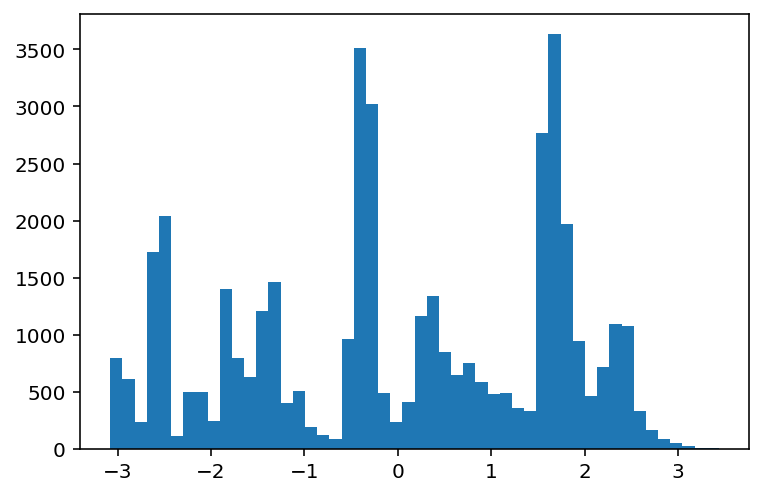

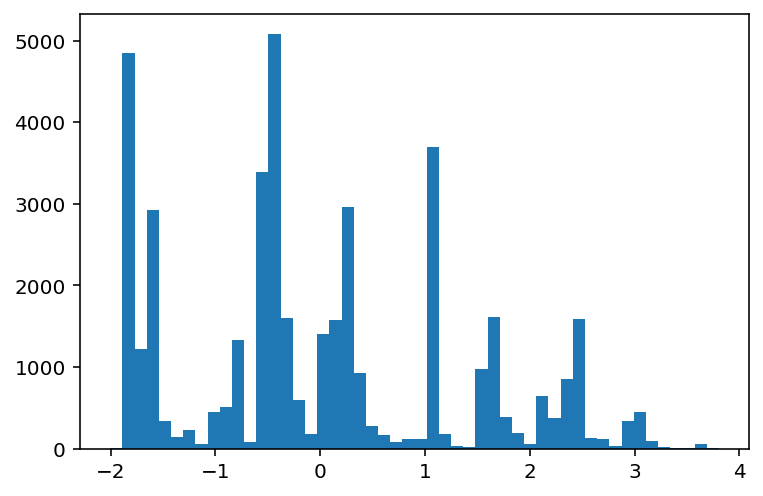

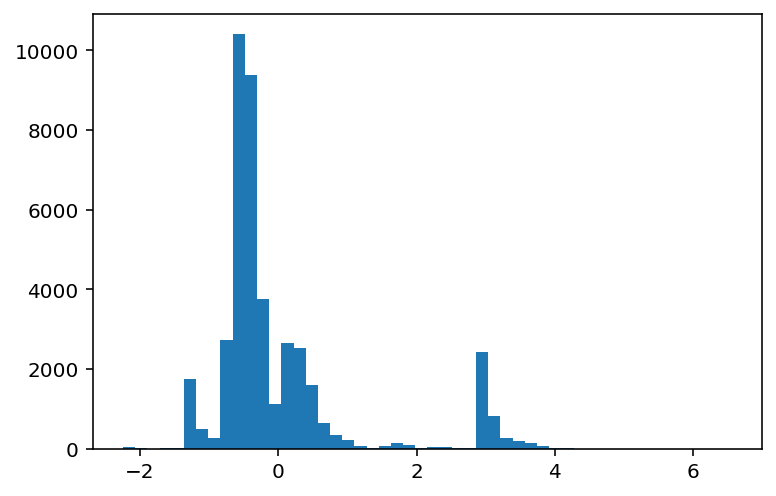

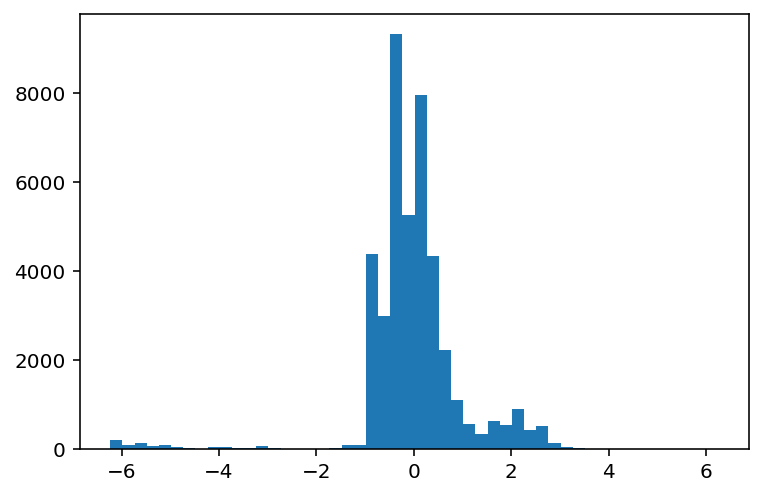

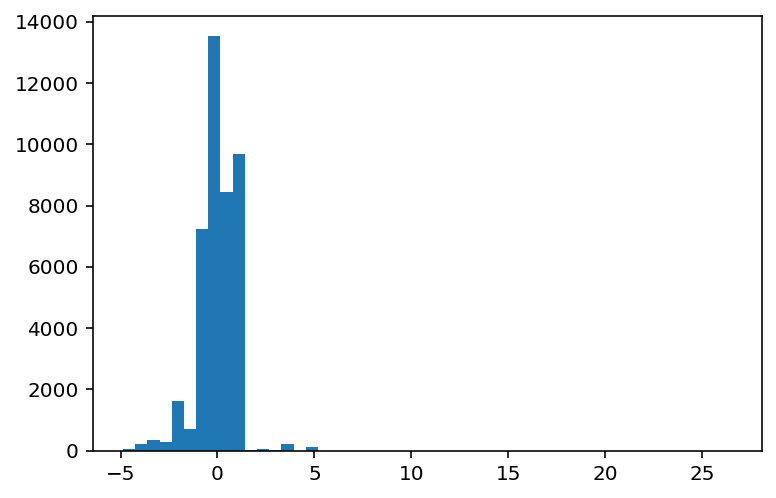

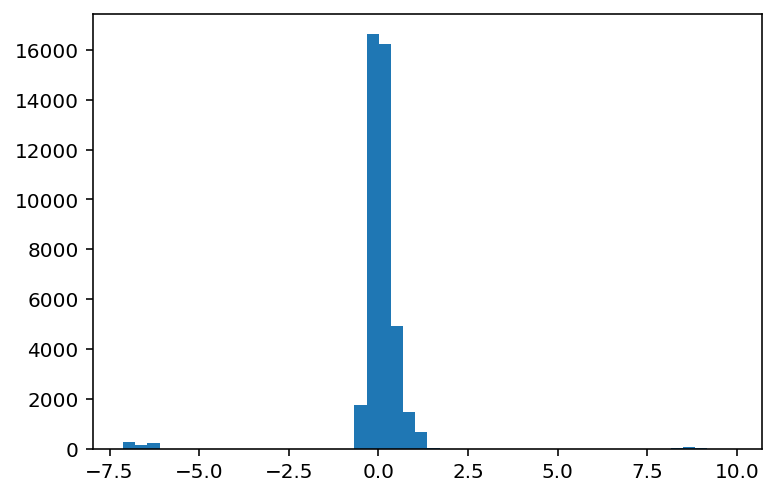

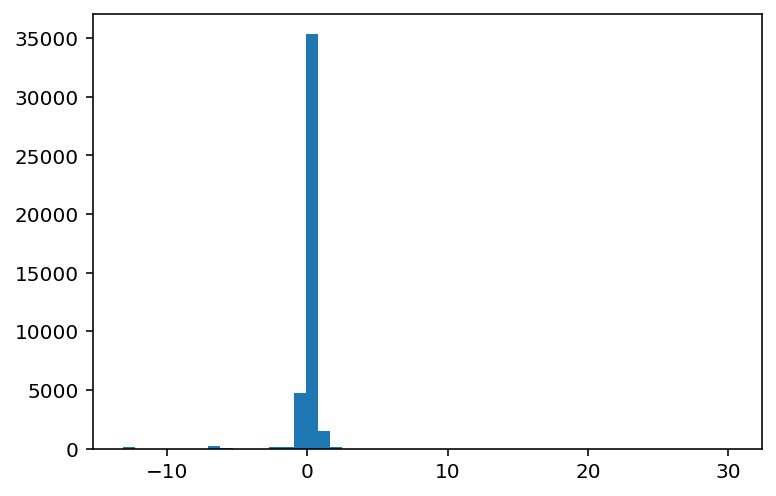

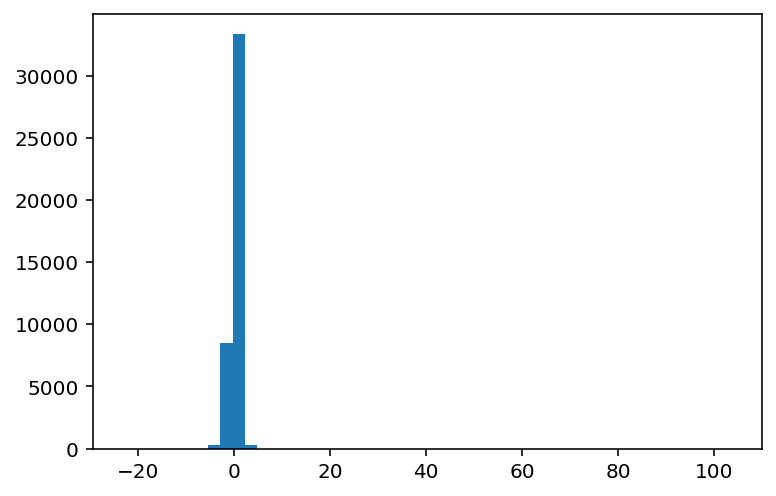

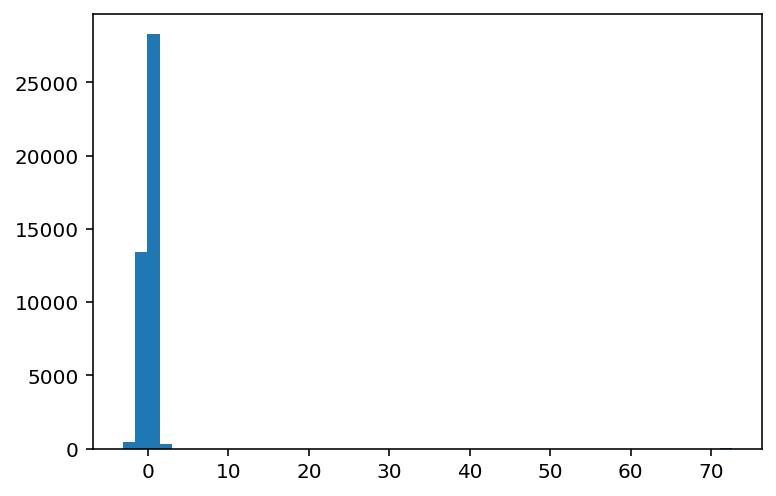

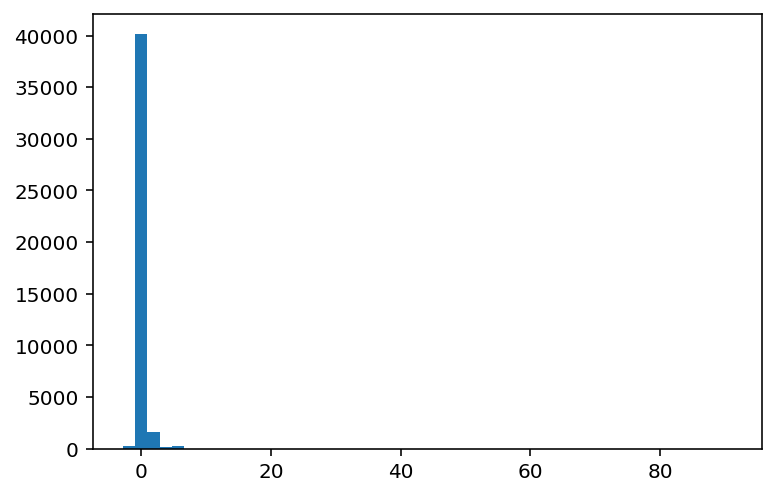

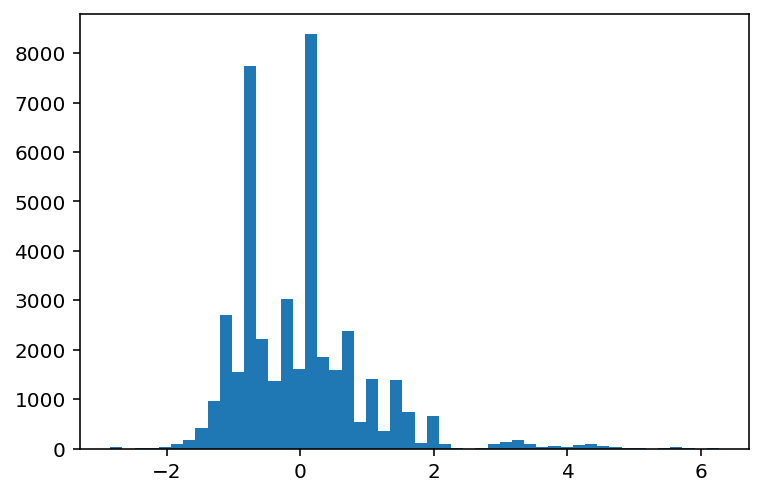

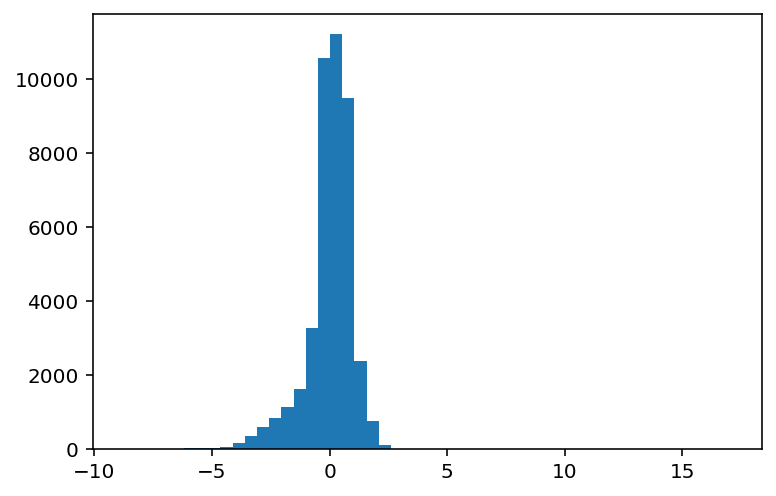

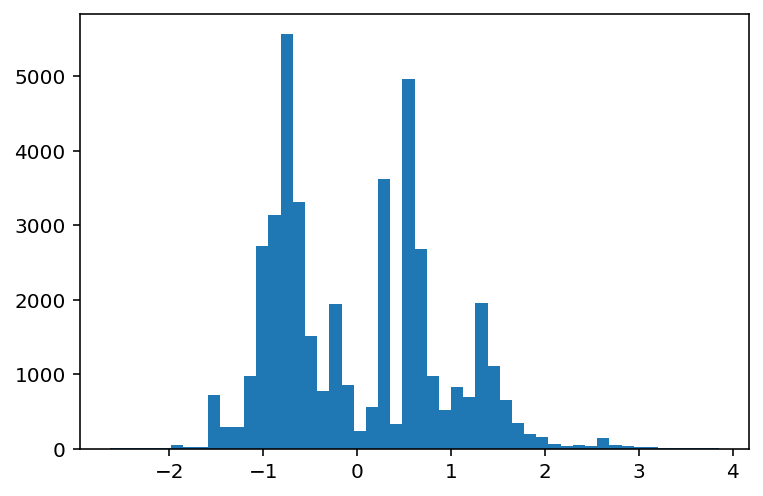

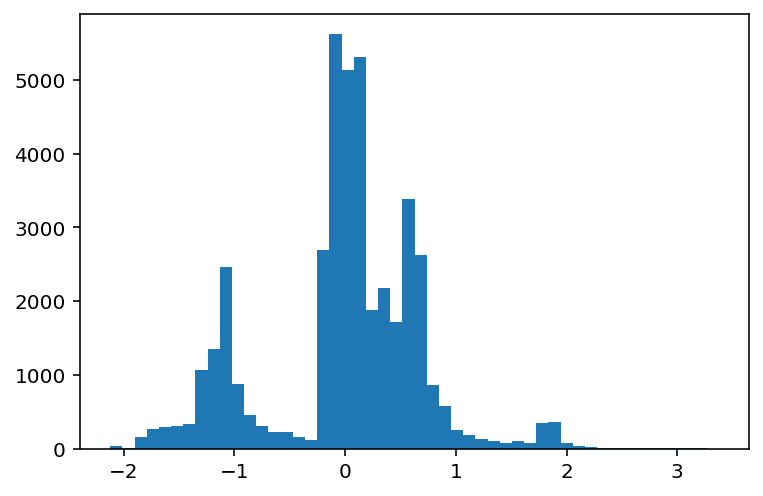

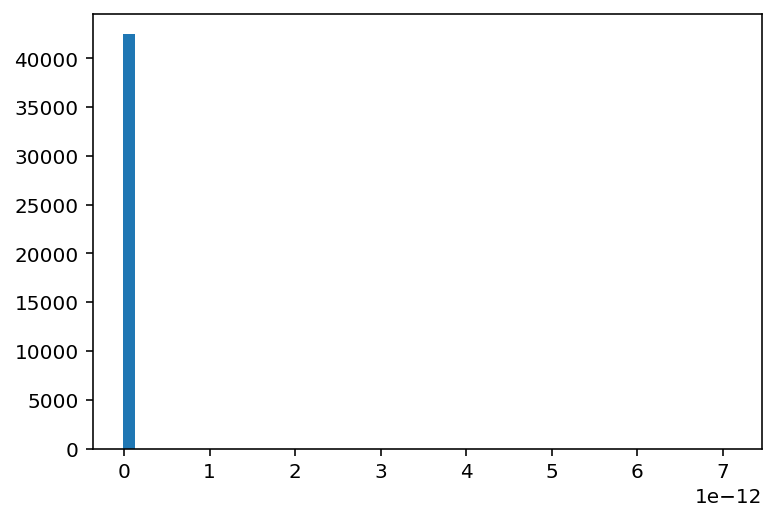

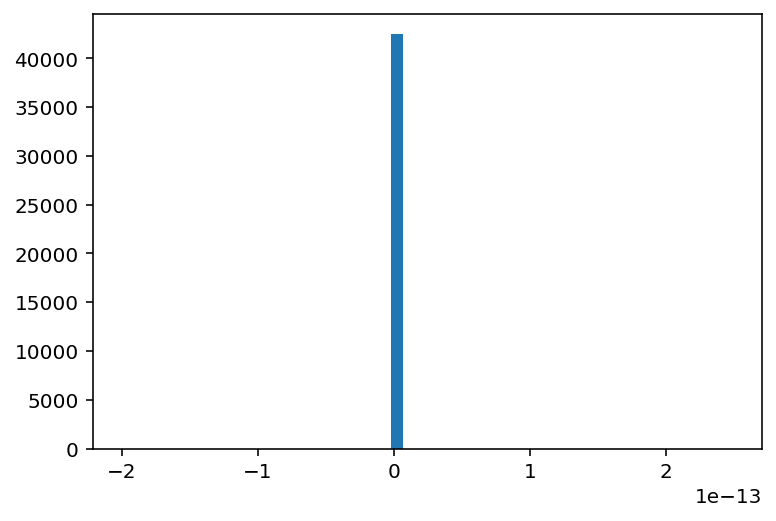

In [97]:
for i in range(0,16):
    plt.hist(ppl[:,i],50)
    plt.show()

классно, видно несколько кластеров животных: внутри кластера они похожи друг на друга, межу кластерами - нет:

Text(0.5, 1.0, 'Животные из приюта')

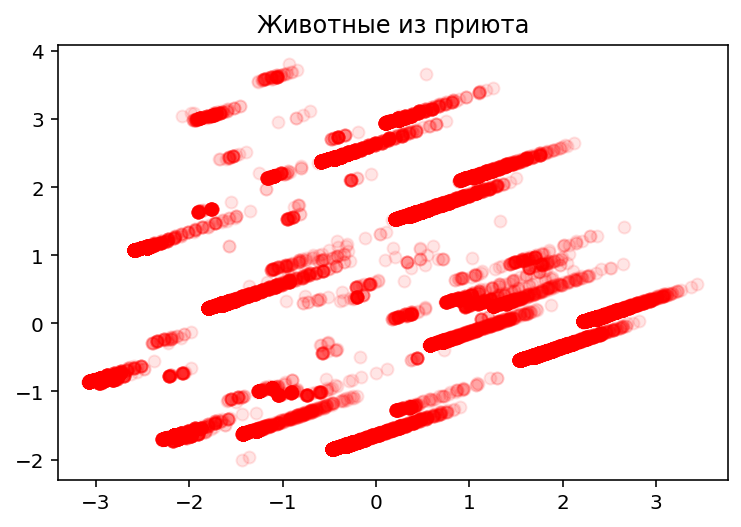

In [93]:
plt.plot(ppl[:,0], ppl[:,1], 'ro', alpha=0.1)
plt.title('Животные из приюта')

можно попробовать кластеризовать по 7 кластерам и проверить, что получится:

In [43]:
from sklearn.cluster import KMeans

In [106]:
n_clusters = 7

In [107]:
kmeans = KMeans(n_clusters=n_clusters)

In [108]:
kmeans.fit(X_train_imputed_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [109]:
cluster_labels = kmeans.predict(X_train_imputed_scaled)

In [110]:
cluster_labels.shape

(42458,)

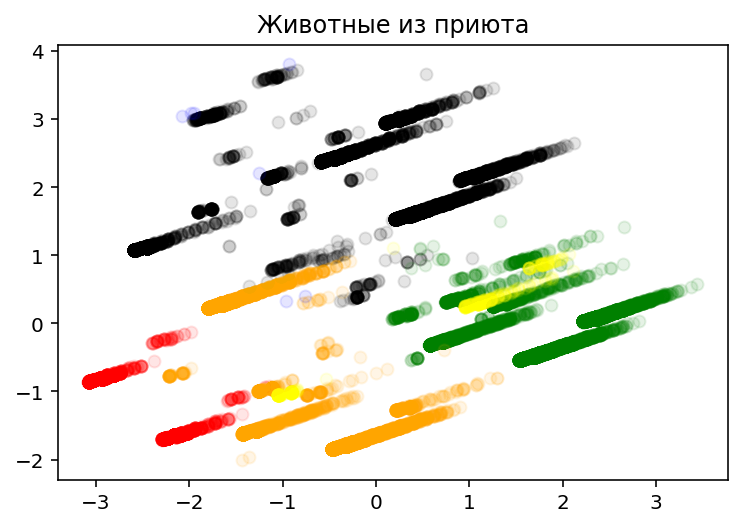

In [112]:
plt.title('Животные из приюта')
for i,color in zip(range(n_clusters),{'blue','red','green','black','orange','yellow'}):
    t = ppl[cluster_labels==i]
    plt.plot(t[:,0], t[:,1], 'ro', alpha=0.1, c=color)

эти номера кластеров можно было бы подать как ещё одна фича

### Разделение на обучающую и тестирующую выборки

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train_fin, X_val, y_train_fin, y_val = train_test_split(X_train_imputed_scaled, y_train, test_size=0.2)

In [51]:
X_train_fin.shape

(33966, 16)

In [52]:
X_val.shape

(8492, 16)

In [53]:
X_test_imputed_scaled.shape

(14152, 16)

In [54]:
y_train_fin.shape

(33966,)

In [55]:
y_val.shape

(8492,)

### Обучение с кросс-валидацией

кросс-валидация поможет нам подобрать лучший параметр регуляризации

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [57]:
cs = 10**np.linspace(-3,1,5)
cs

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [58]:
grid = {'C': cs}
gridsearch = GridSearchCV(LogisticRegression(), grid, scoring='accuracy', cv=5)

In [59]:
%%time
gridsearch.fit(X_train_fin, y_train_fin)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklea

Wall time: 7.86 s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [60]:
gridsearch.best_params_

{'C': 0.001}

In [61]:
best_C = gridsearch.best_params_["C"]

# Оценка точности

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
clf = LogisticRegression(C=best_C)

In [64]:
clf.fit(X_train_fin, y_train_fin)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
y_val_pred = clf.predict(X_val)

In [66]:
accuracy_score(y_val, y_val_pred)

0.9998822421102214

# Финальное предсказание

In [67]:
clf.fit(X_train_imputed_scaled, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

предсказание вероятностей принадлежности классу 0 и 1:

In [68]:
clf.predict_proba(X_test_imputed_scaled)[:10]

array([[0.9147842 , 0.0852158 ],
       [0.0614459 , 0.9385541 ],
       [0.11707108, 0.88292892],
       [0.03437636, 0.96562364],
       [0.03458334, 0.96541666],
       [0.93802678, 0.06197322],
       [0.97505923, 0.02494077],
       [0.97538353, 0.02461647],
       [0.05099012, 0.94900988],
       [0.03676036, 0.96323964]])

предсказание номера класса:

In [69]:
predictions = clf.predict(X_test_imputed_scaled)
predictions

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [70]:
for col, val in zip(X_train.columns, clf.coef_[0]):
    print("{:30} {:.2f}".format(col, val))

isMix                          -0.01
age_days                       -0.04
isMale                         0.04
isReproductive                 -0.44
animal_type_Bird               0.01
animal_type_Cat                -0.07
animal_type_Dog                0.08
animal_type_Livestock          -0.00
animal_type_Other              -0.05
outcome_subtype_Barn           -0.00
outcome_subtype_Foster         0.71
outcome_subtype_Offsite        0.19
outcome_subtype_Partner        -1.53
outcome_subtype_SCRP           -0.64
outcome_subtype_Snr            -0.23
outcome_subtype_Unknown        1.37
